In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [3]:
energy = pd.read_csv('archive/energy_dataset.csv')

In [4]:
energy.head() # head() method returns top 5 rows from  dataset, that way we can clearly observe dataset

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
energy.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [6]:
energy.info() # We use info() method For accessing information about dataset such as, properties of data, types of data and number of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

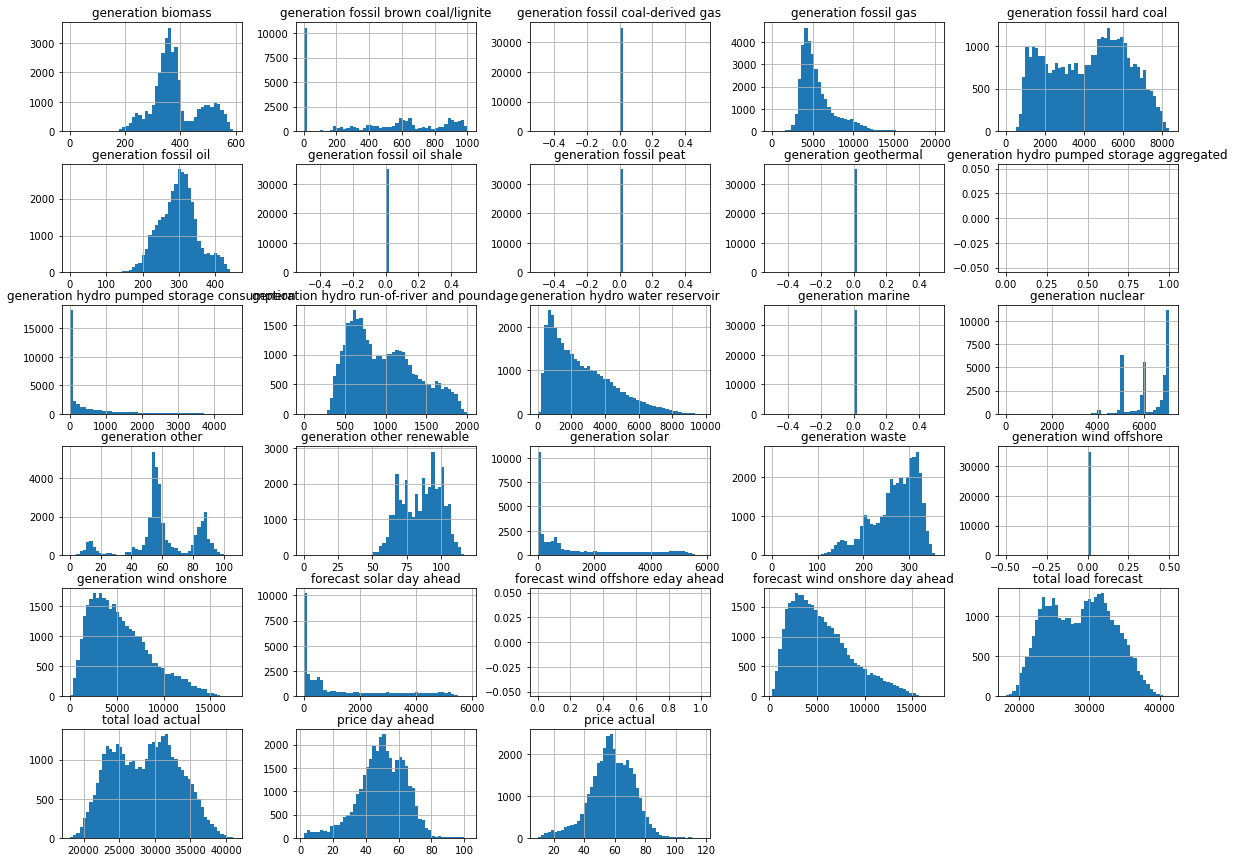

In [7]:
# We plot data as histograms for visualization

energy.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
# Convert time to datetime object and set it as index

energy['time'] = pd.to_datetime(energy['time'], utc=True, infer_datetime_format=True)
energy = energy.set_index('time')

In [9]:
# Find NaNs and duplicates in df_energy

print('There are {} missing values or NaNs in df_energy.'
      .format(energy.isnull().values.sum()))

temp_energy = energy.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 70529 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


In [10]:
energy_copy = energy.copy()

In [11]:
nulls_and_zeros = ['generation fossil coal-derived gas','generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 
                   'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead',
                   'total load forecast', 'forecast solar day ahead', 'forecast wind onshore day ahead']

In [12]:
energy_copy = energy_copy.drop(columns = nulls_and_zeros, axis = 1)

In [13]:
energy_copy.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [11]:
energy_copy= energy_copy.fillna(method="ffill") # Since number of null values is small, we can use fillna method.

In [12]:
energy_copy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04


# Detecting Outliers

We will use Interquartile Range(IQR) method for detecting outliers in dataset. Working princible of this method is we basically apply some threshold on datset. We call this thershold as lower fence and upper fence. If sample data is outside of this range (lower and upper fence) we consider it as an outlier.
What are the steps for applying IQR method ?
- First we sort the data
- Then we find the values of Q1(first percentile) and Q3(third percentile)
- After finding Q1 and Q3 we calculate IQR which equals Q3 - Q1
- Lastly we calculate lower and upper fences by using calculated IQR value 

After applying IQR method we could demonstrate using boxplots.
How we interpret boxplot demonstration?<br>

<img src="iqr.png" alt="iqr demonstration" height="500px" width="1000px">

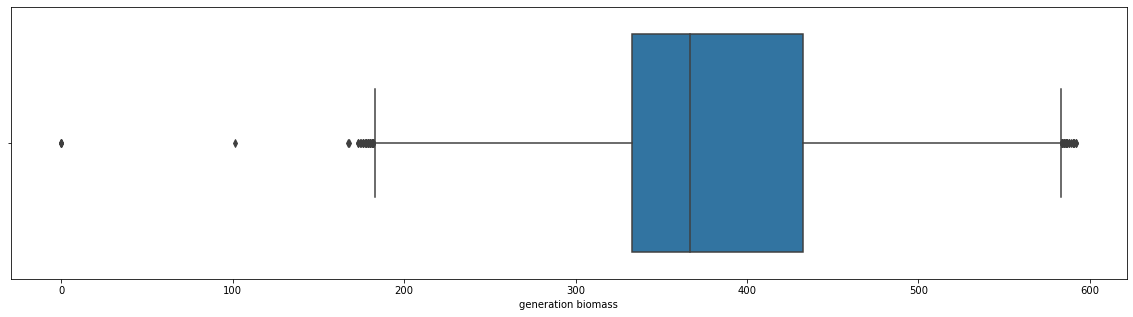

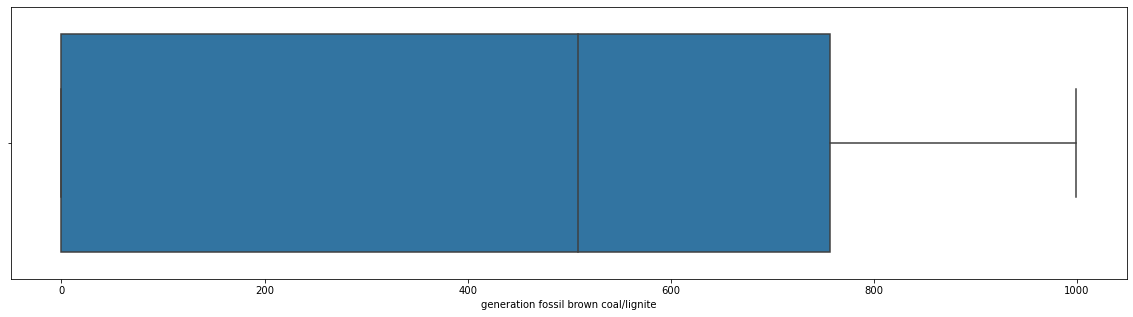

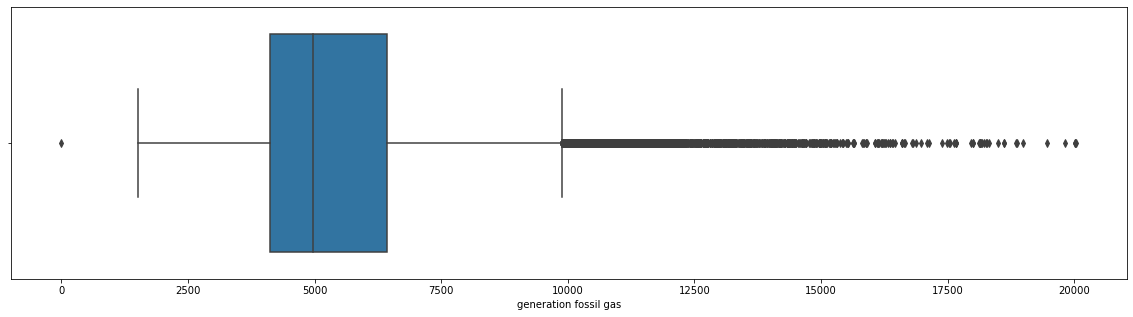

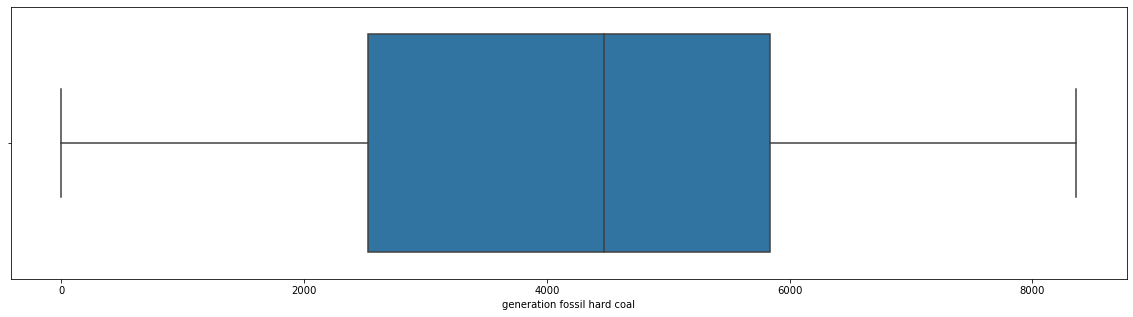

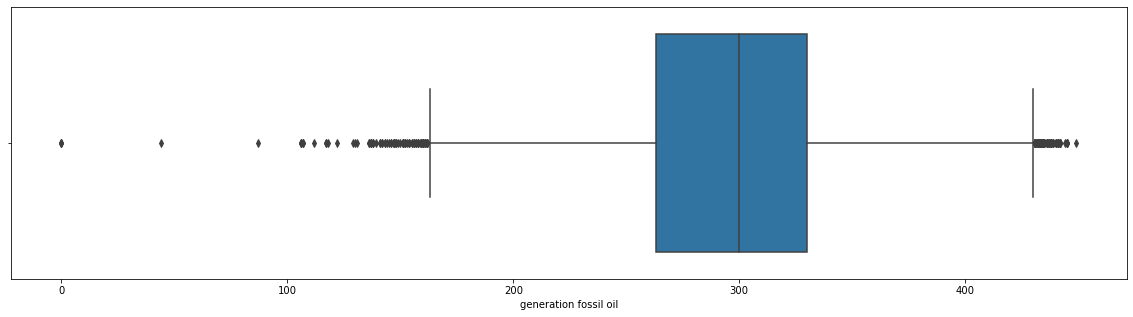

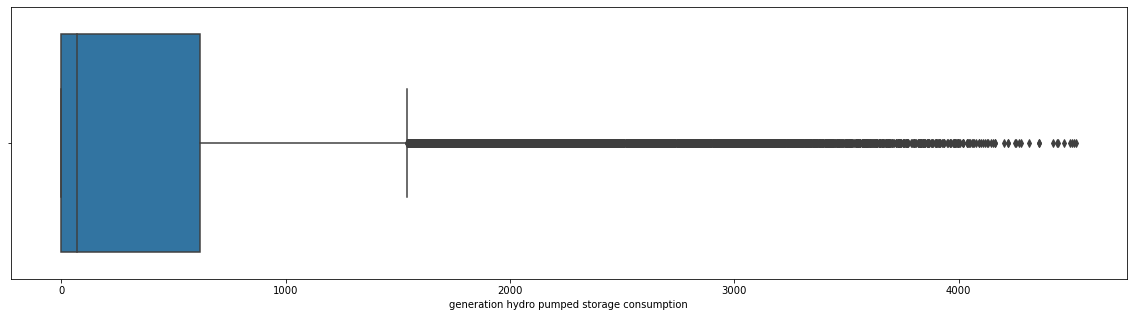

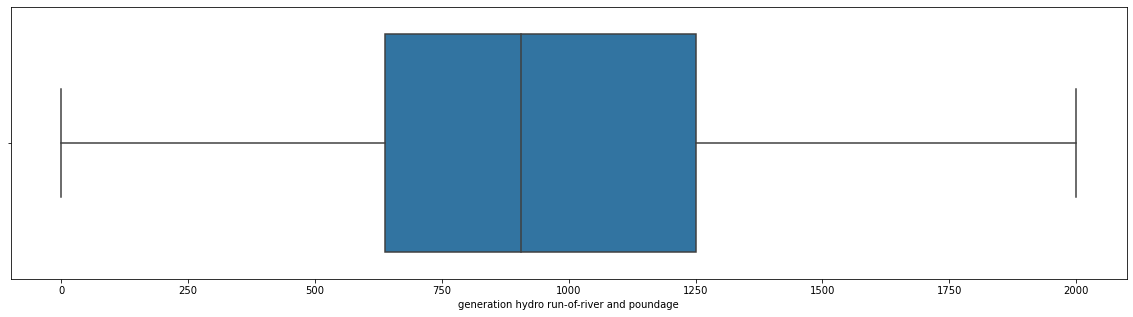

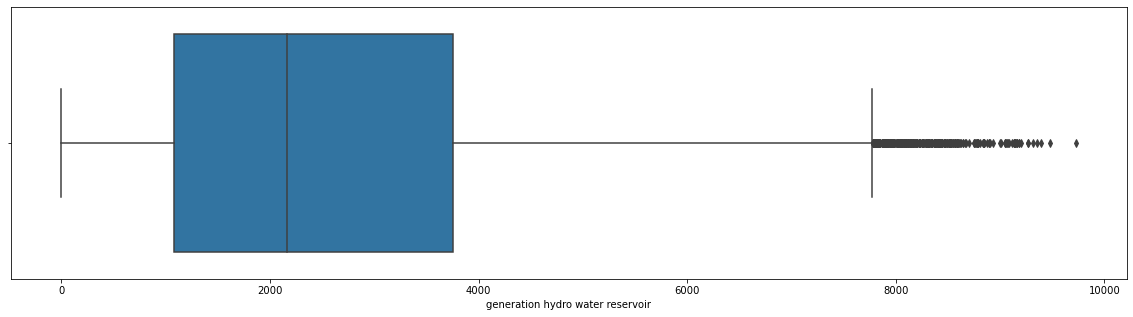

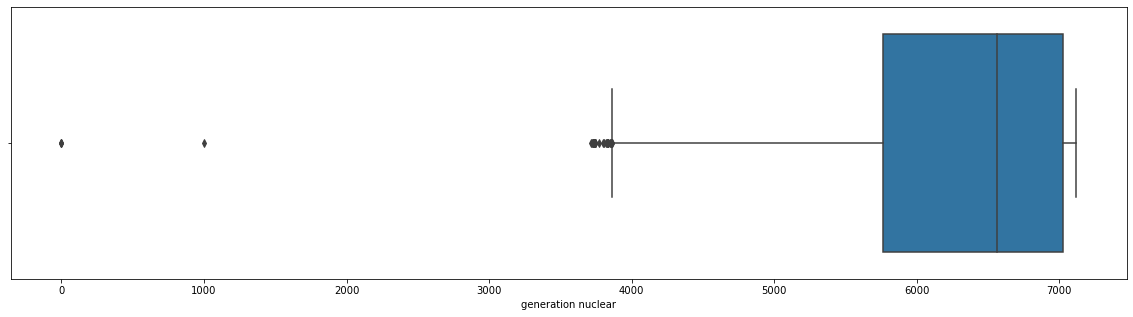

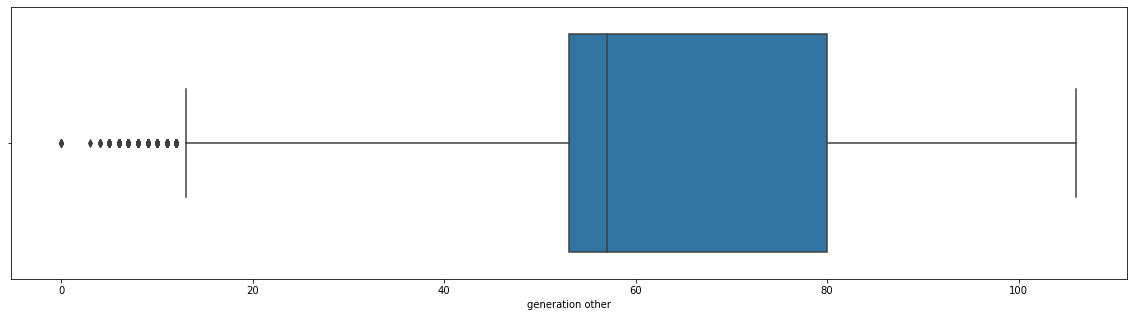

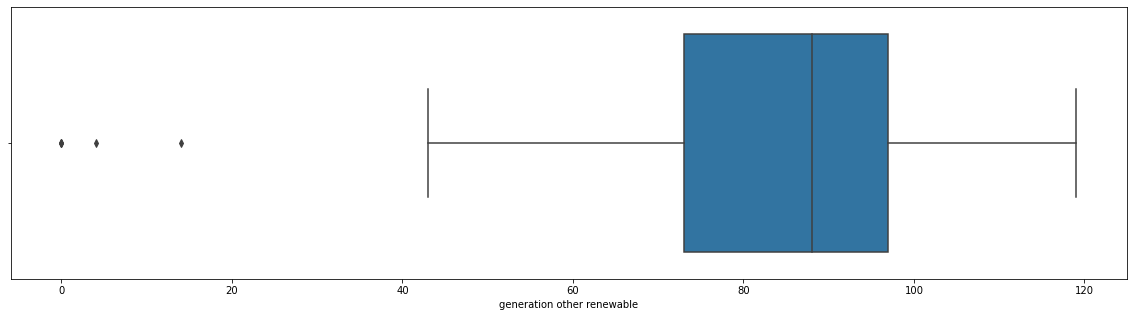

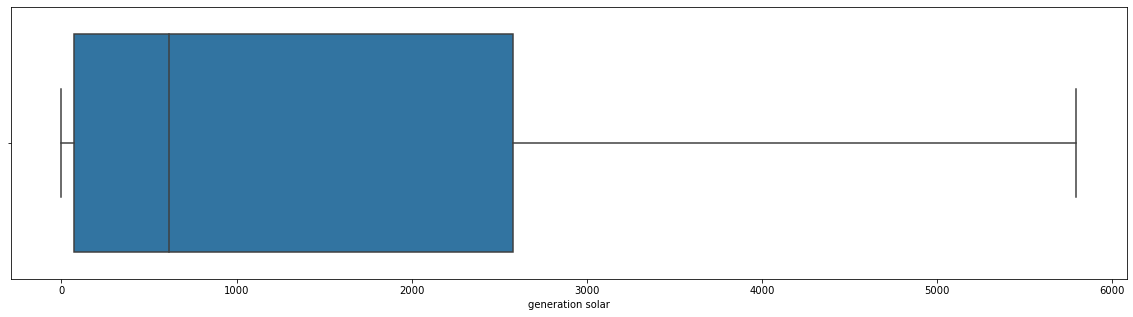

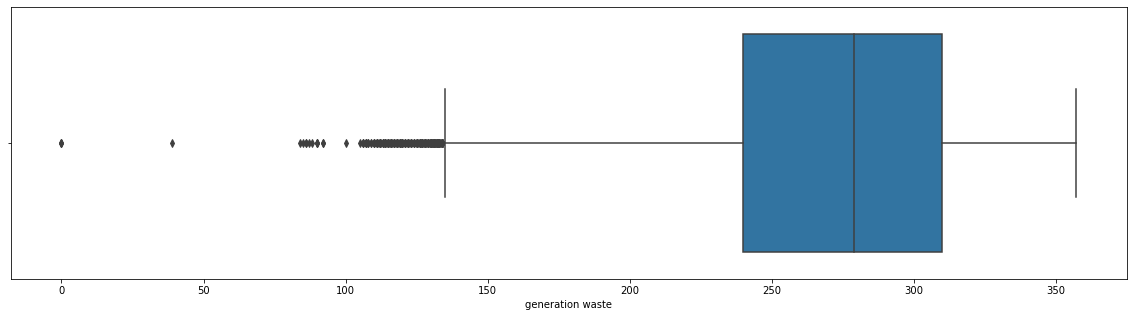

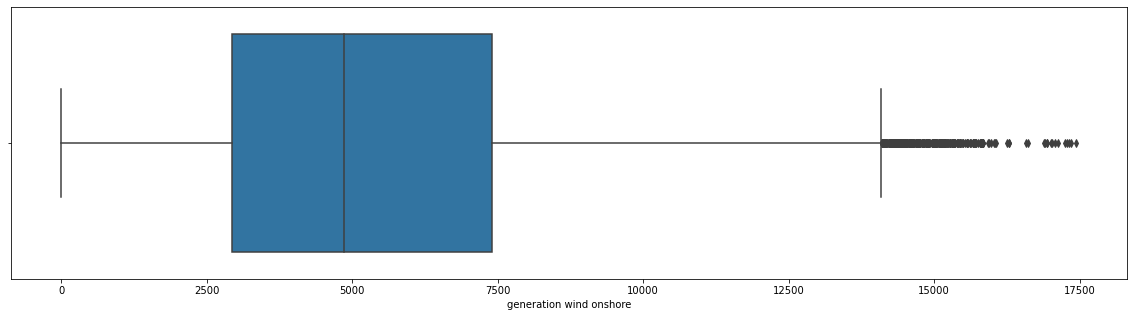

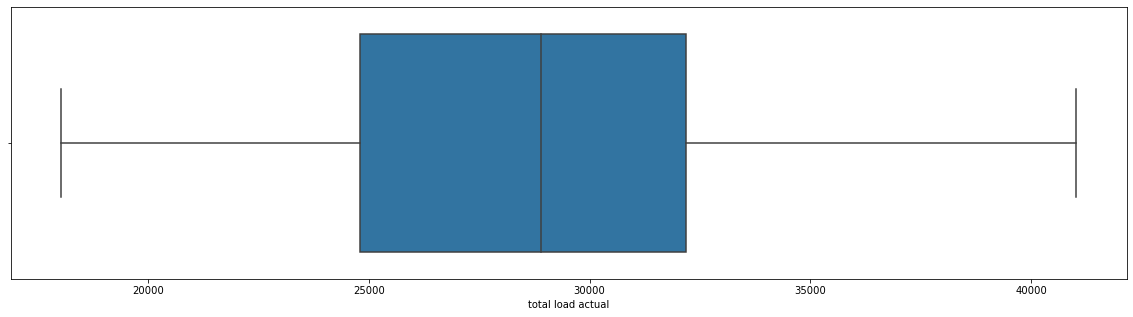

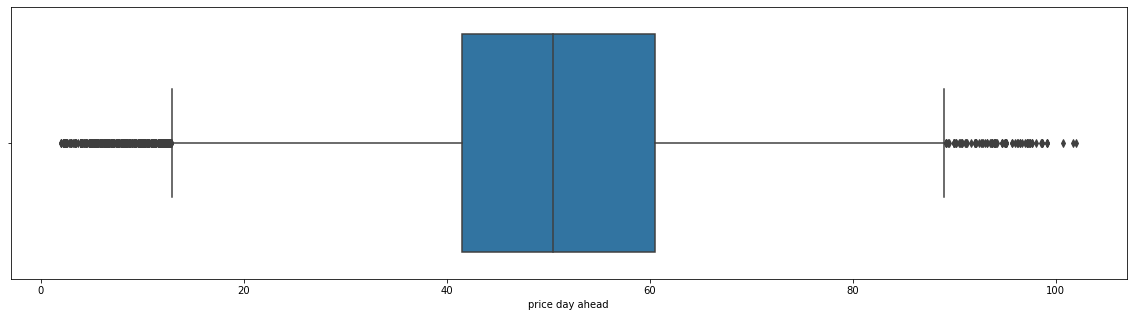

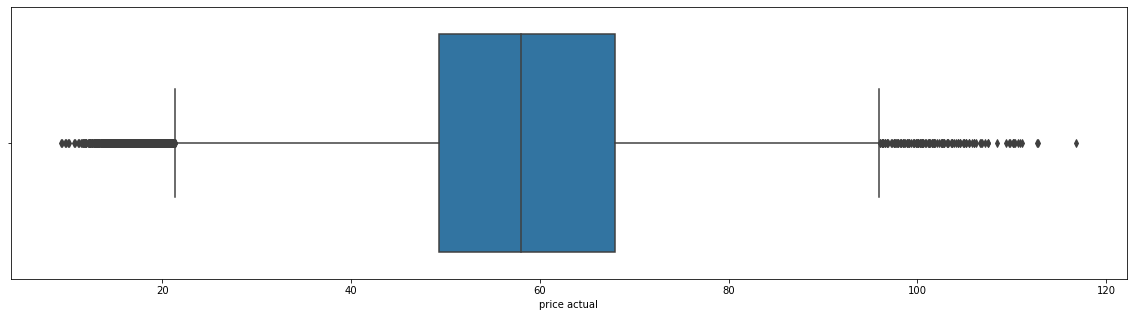

In [14]:
energy_replaced = energy_copy.copy()
for data in energy_replaced:
    plt.figure(figsize=(20, 5))
    sns.boxplot(energy_copy[data])


In [13]:
def detect_outliers_iqr(dataset):
    outliers = []
    dataset = sorted(dataset)
    q1,q3 = np.percentile(dataset, [25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    for i in range(len(dataset)):
        if dataset[i] < lower_fence or dataset[i] > upper_fence:
            outliers.append(dataset[i])
    return outliers


In [14]:
sample_outliers = []
for i in range(1, len(energy_copy.count())): # Time stamps are not included
    sample_outliers.append(detect_outliers_iqr(energy_copy.iloc[:,i]))

In [15]:
def replace_outliers(data, sample_index):
    median = np.median(data)
    index = 0
    if len(sample_outliers[sample_index]) == 0: # returns if sample has no outlier
        return
    for (i, v) in data.iteritems():
        if sample_outliers[sample_index][index] == v:
            data[i] = median #replacing outlier with median value
            if index < len(sample_outliers[sample_index]) - 1:
                index +=1

In [16]:
energy_outliers = energy_copy.copy() # We copy our dataframe and replace outliers on this new dataframe.
for i in range(1, len(sample_outliers)):
    replace_outliers(energy_outliers.iloc[:,i], i)

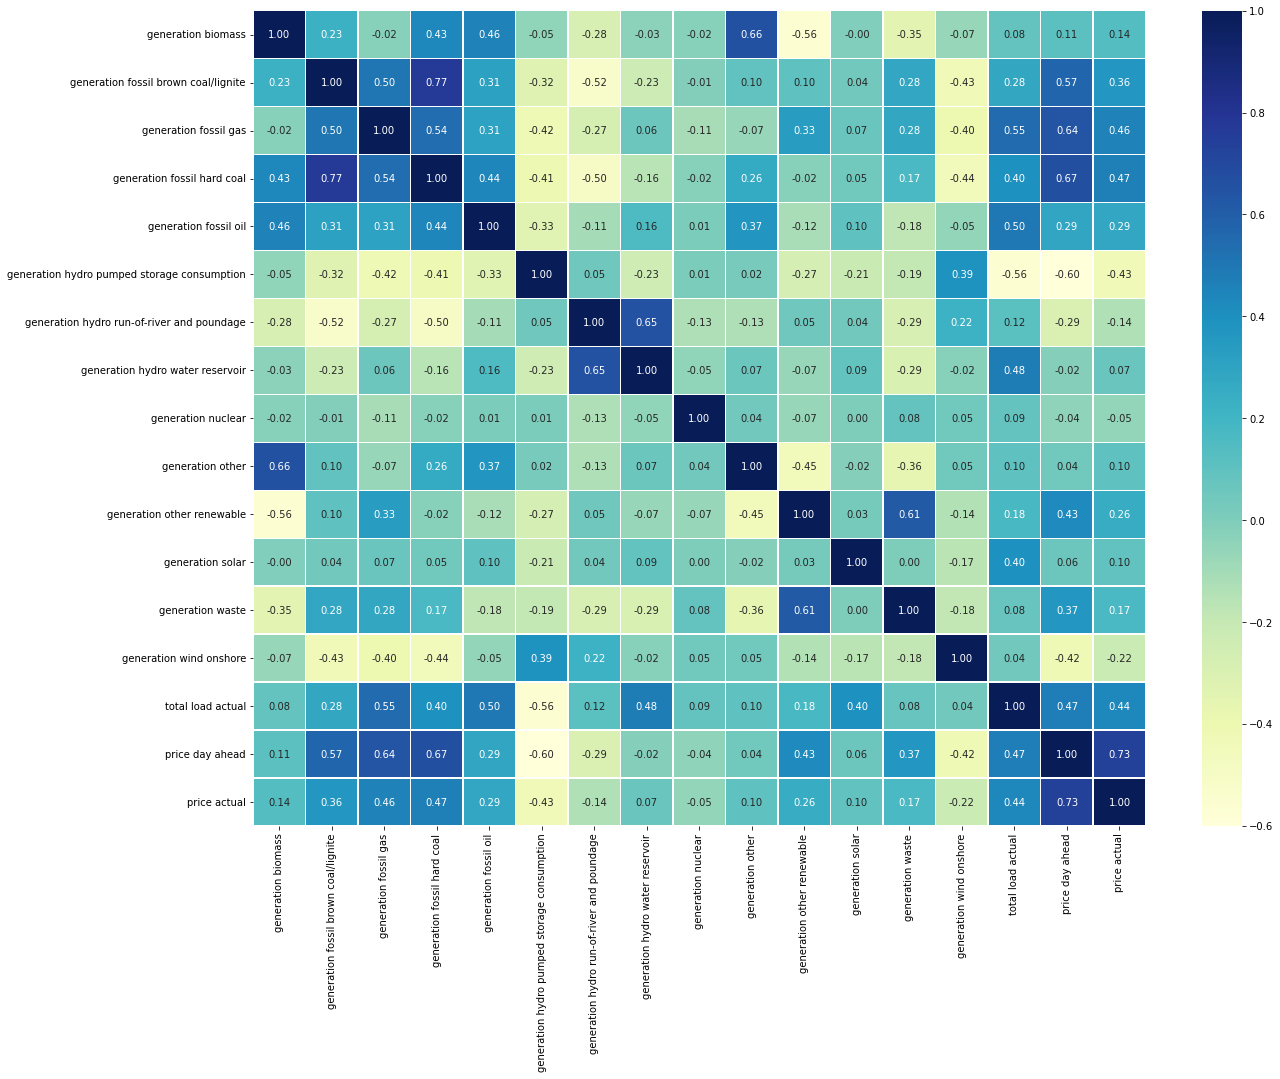

In [18]:
from matplotlib import rcParams # For changing figure size

corr = energy_outliers.corr()
rcParams['figure.figsize'] = 20,15 # set figure size here
sns.heatmap(corr, linewidths=.5, cmap = 'YlGnBu', annot = True, fmt='.2f')

In [17]:
energy_outliers.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04


In [18]:
weather = pd.read_csv('archive/weather_features.csv')

In [19]:
weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [20]:
weather.tail()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
178391,2018-12-31 19:00:00+01:00,Seville,287.76,287.15,288.15,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.76,285.15,286.15,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.15,285.15,285.15,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.15,284.15,284.15,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178395,2018-12-31 23:00:00+01:00,Seville,283.97,282.15,285.15,1029,70,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [21]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

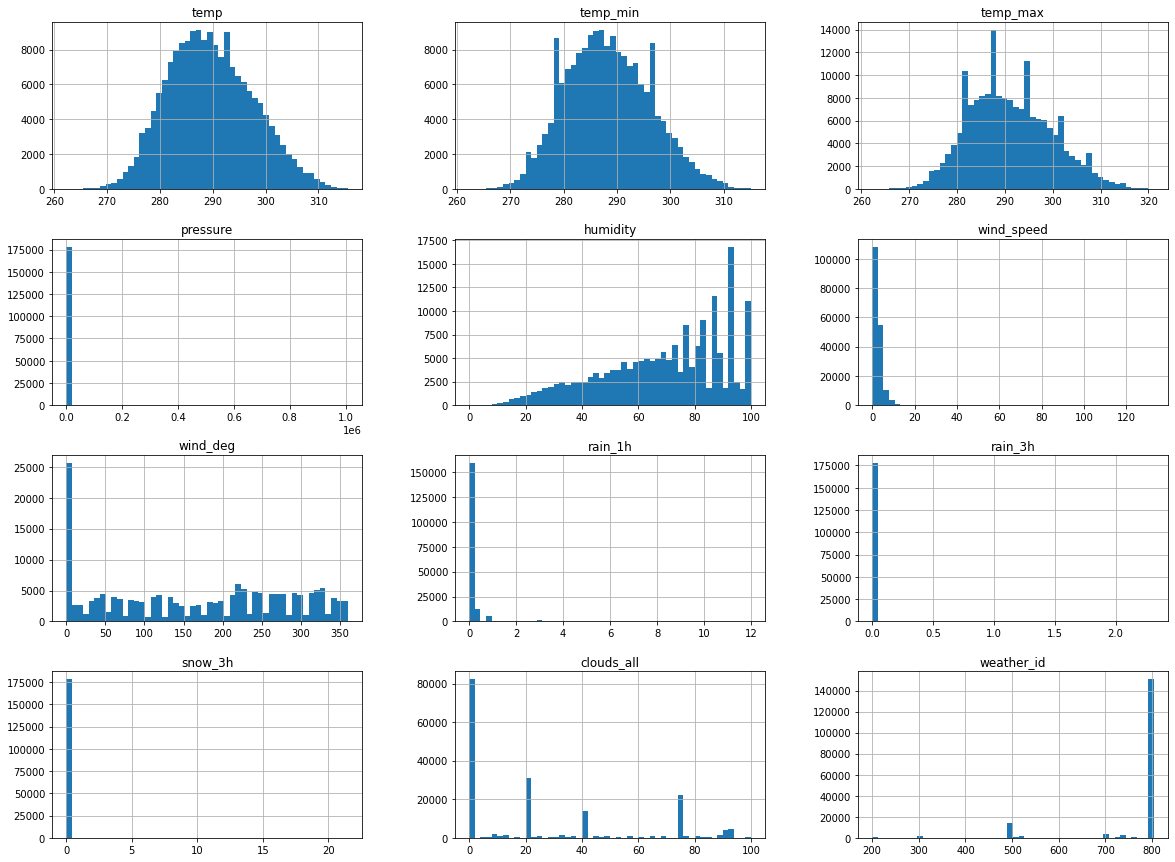

In [ ]:
weather.hist(bins=50,figsize=(20,15))
plt.show()

In [22]:
weather.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

Since our dataset has observations in 1 hour timestamp we can drop rain_3h and snow_3h columns.

In [23]:
weather = weather.drop(columns = ['rain_3h', 'snow_3h'], axis = 1)

We have to change the type of some of the columns, so that all of them are float64. We also have to parse 'dt_iso' correctly and actually rename it as 'time' so that it matches with the index of energy.

In [24]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [25]:
# Convert columns with int64 type values to float64 type

weather = df_convert_dtypes(weather, np.int64, np.float64)

In [26]:
# Convert dt_iso to datetime type, rename it and set it as index

weather['time'] = pd.to_datetime(weather['dt_iso'], utc=True, infer_datetime_format=True)
weather = weather.drop(['dt_iso'], axis=1)
weather = weather.set_index('time')

# Handling Categorical Values
From info() function, we can see that we have 5 categorical values. Those are; time, city_name, weather_main, weather_description and weather_icon.<br> When we observe the data we saw that timestamps given in hourly time frame. For each city we have an obervation timespan. So we can split our dataset for each city. Also weather_main, weather_description and weather_icon contains similiar categorical information. So, we can select just one of them for increasing our models accuracy. Lets deal with 3 same categorical feature first, then we can split our dataset. For doing that lets see what are the unique features in these columns.

In [27]:
# weather_description  = weather['weather_description'].unique()
# weather_icon  = weather['weather_icon'].unique()

print(f"""Unique features of wheater main: {weather['weather_main'].unique()} \n
Unique features of wheater description: {weather['weather_description'].unique()} \n
Unique features of wheater icon: {weather['weather_icon'].unique()}""")

Unique features of wheater main: ['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze' 'snow' 'dust' 'squall'] 

Unique features of wheater description: ['sky is clear' 'few clouds' 'scattered clouds' 'broken clouds'
 'overcast clouds' 'light rain' 'moderate rain' 'heavy intensity rain'
 'mist' 'heavy intensity shower rain' 'shower rain' 'very heavy rain'
 'thunderstorm with heavy rain' 'thunderstorm with light rain'
 'thunderstorm with rain' 'proximity thunderstorm' 'thunderstorm'
 'light intensity shower rain' 'light intensity drizzle' 'fog' 'drizzle'
 'smoke' 'heavy intensity drizzle' 'haze' 'proximity shower rain'
 'light intensity drizzle rain' 'light snow' 'rain and snow'
 'light rain and snow' 'snow' 'light thunderstorm' 'heavy snow' 'sleet'
 'rain and drizzle' 'shower sleet' 'light shower sleet'
 'light shower snow' 'proximity moderate rain' 'ragged shower rain'
 'sand dust whirls' 'proximity drizzle' 'dust' 'squalls'] 

Unique features of wheater icon:

When we inspect the unique features of weather icon we can see that, informations are not meaningful. So we can consider to drop that column. Also wheater description contains so many information, as we know using unrelated features increases the loss of the model. We should feed our model with only using useful information. In that case using wheater main column will be best option for us. We can transform categorical information to numeric information using label encoder.

In [28]:
weather = weather.drop(columns = ['weather_description', 'weather_icon'], axis = 1)

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
weather['weather_main'] = labelencoder.fit_transform(weather['weather_main'])

In [30]:
weather.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_id,weather_main
time,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,800.0,0
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,800.0,0
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,0
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,0
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,0


Before splitting dataset for each unique city, we have to be make sure about we don't have any duplicate values.

In [31]:
print('There are {} observations in df_energy.'.format(energy_outliers.shape[0]))

cities = weather['city_name'].unique()
grouped_weather = weather.groupby('city_name')

for city in cities:
    print('There are {} observations in weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))


There are 35064 observations in df_energy.
There are 35145 observations in weather about city: Valencia.
There are 36267 observations in weather about city: Madrid.
There are 35951 observations in weather about city: Bilbao.
There are 35476 observations in weather about city:  Barcelona.
There are 35557 observations in weather about city: Seville.


In [32]:
weather = weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time') # we get first value if there are any duplicate elements 

In [33]:
print('There are {} observations in df_energy.'.format(energy_outliers.shape[0]))

cities = weather['city_name'].unique()
grouped_weather = weather.groupby('city_name')

for city in cities:
    print('There are {} observations in weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35064 observations in weather about city: Valencia.
There are 35064 observations in weather about city: Madrid.
There are 35064 observations in weather about city: Bilbao.
There are 35064 observations in weather about city:  Barcelona.
There are 35064 observations in weather about city: Seville.


# Handling Outliers

In [34]:
weather_new = weather.copy()
weather_new = weather_new.drop('city_name', axis = 1)

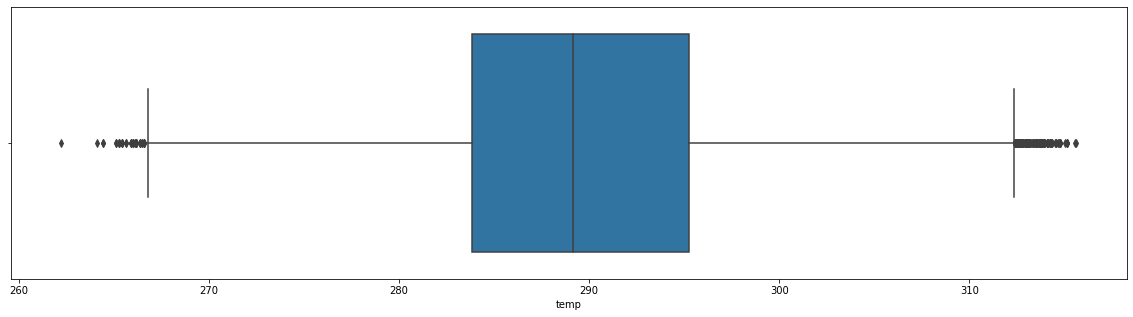

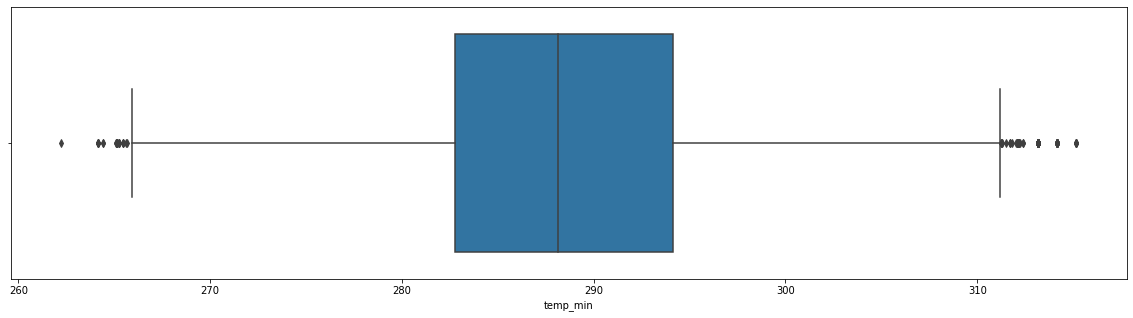

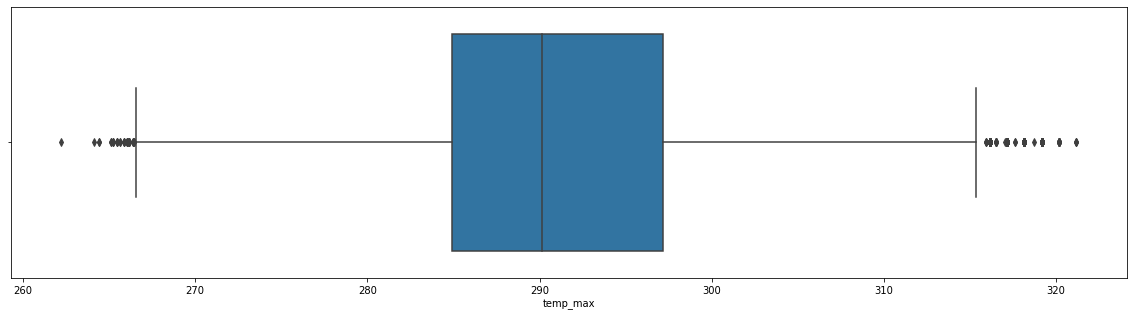

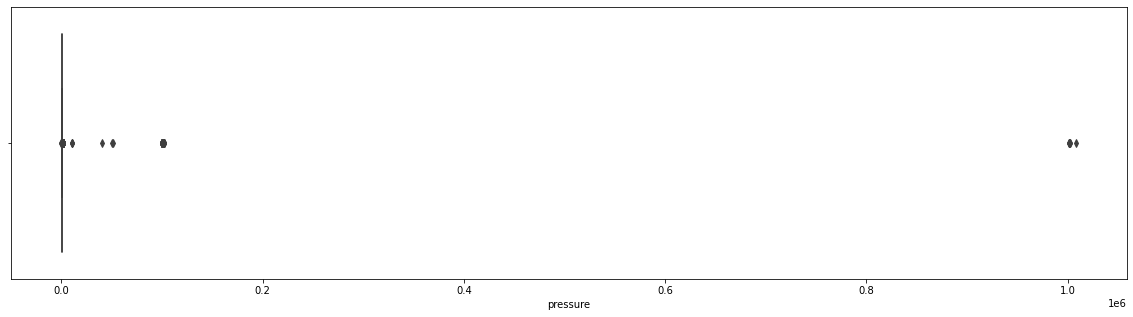

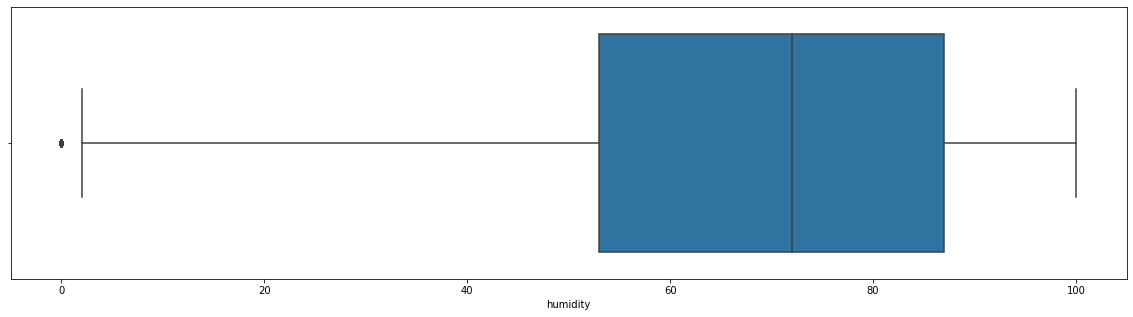

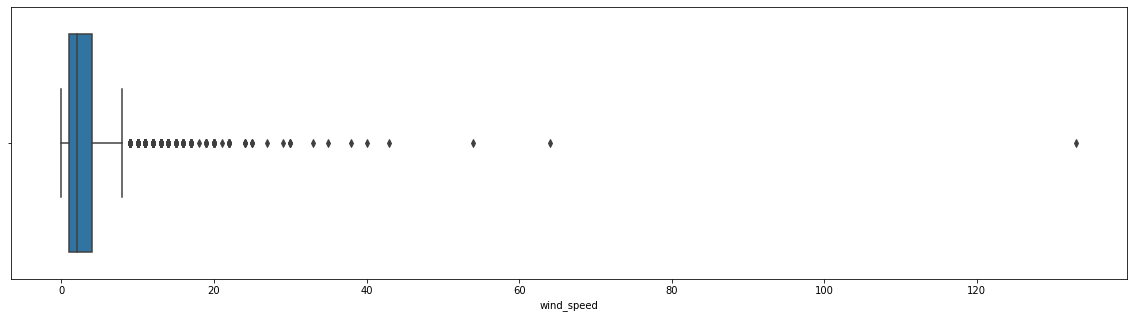

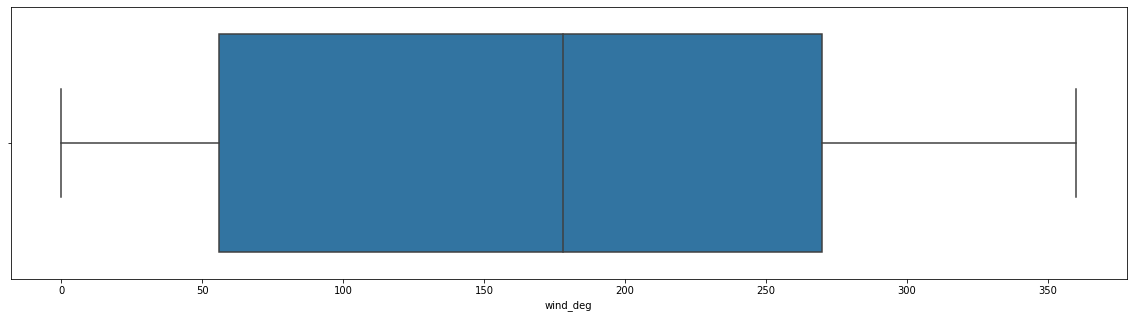

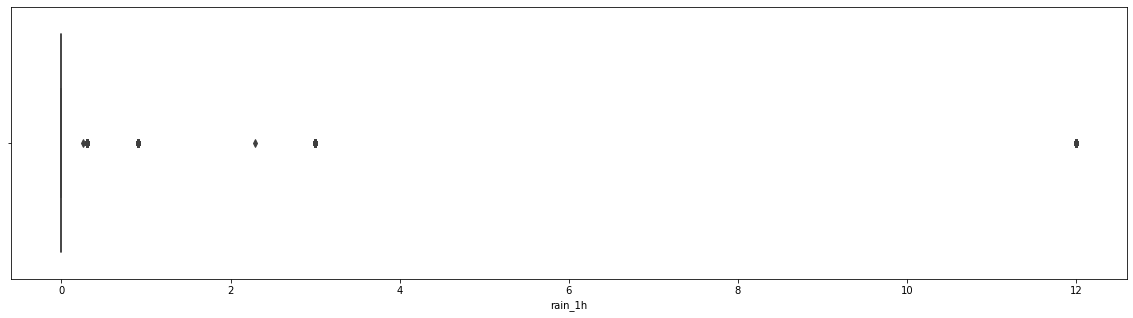

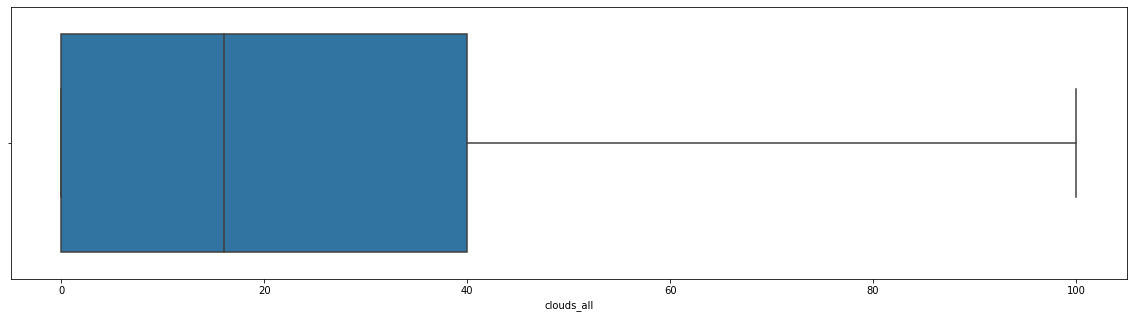

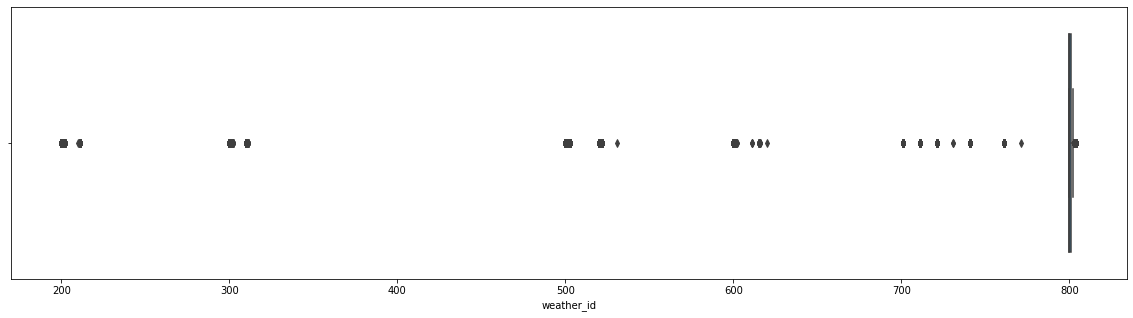

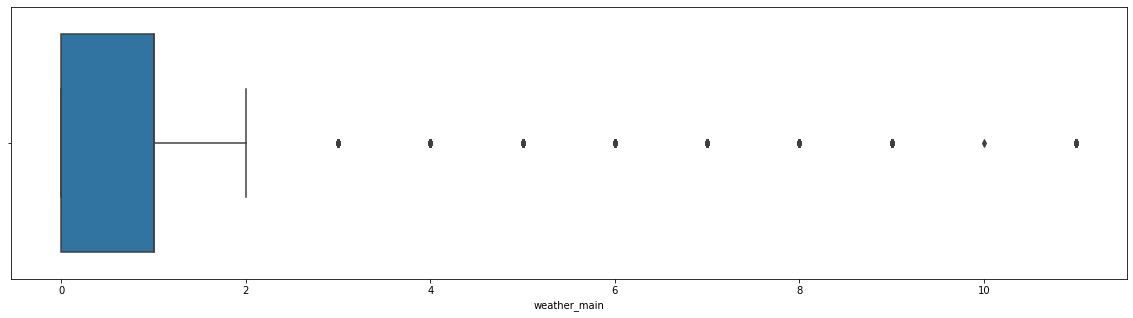

In [ ]:
for data in weather_new:
    plt.figure(figsize=(20, 5))
    sns.boxplot(weather_new[data])

In [35]:
sample_outliers = []
for i in range(2, len(weather.count())): # Time stamps and city names are not included
    sample_outliers.append(detect_outliers_iqr(weather.iloc[:,i]))

In [36]:
weather_outliers = weather.copy() # We copy our dataframe and replace outliers on this new dataframe.
for i in range(2, len(sample_outliers)):
    replace_outliers(weather_outliers.iloc[:,i], i)

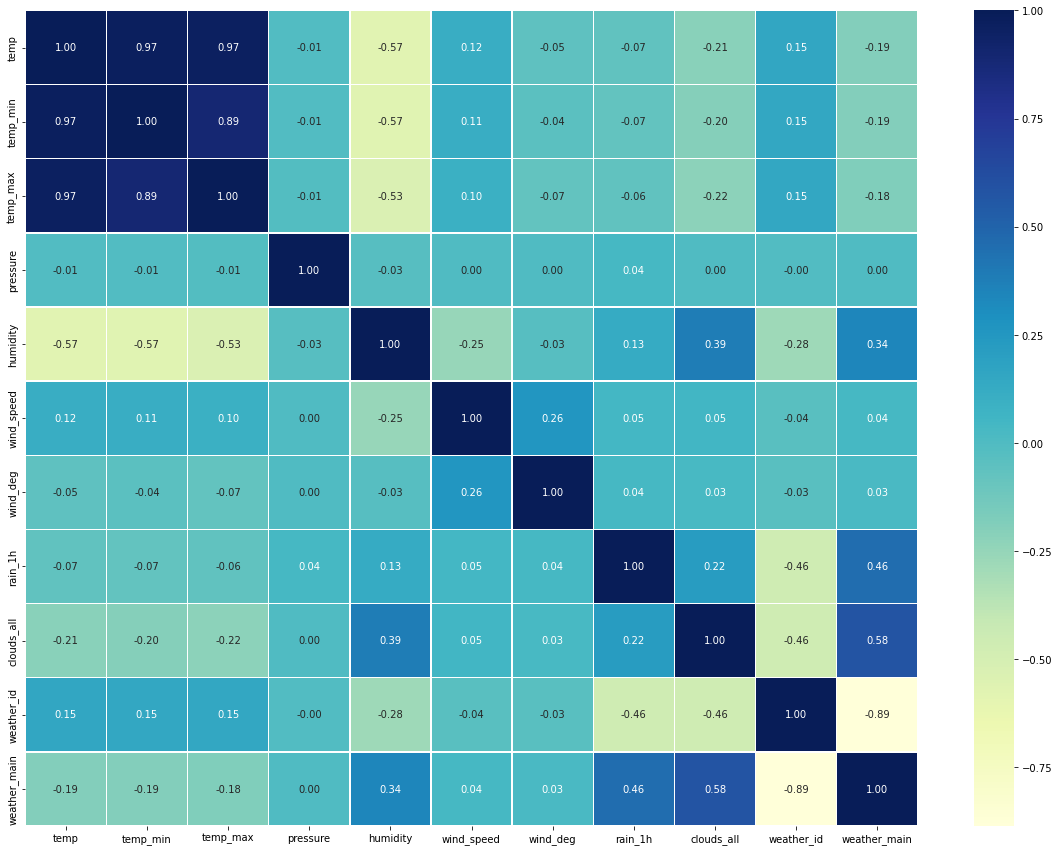

In [37]:
from matplotlib import rcParams # For changing figure size

corr = weather_outliers.corr()
rcParams['figure.figsize'] = 20,15 # set figure size here
sns.heatmap(corr, linewidths=.5, cmap = 'YlGnBu', annot = True, fmt='.2f')

We cleaned and almost finished preprocess of the wheater dataset. Now we can split our weather dataset for each unique city and merge with energy dataset.

In [38]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in weather_outliers.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]
dfs[0].head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_id,weather_main
time,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Barcelona,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,800.0,0
2015-01-01 00:00:00+00:00,Barcelona,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,800.0,0
2015-01-01 01:00:00+00:00,Barcelona,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,800.0,0
2015-01-01 02:00:00+00:00,Barcelona,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,800.0,0
2015-01-01 03:00:00+00:00,Barcelona,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,800.0,0


In [39]:
# Merge all dataframes into the final dataframe

df_final = energy_outliers

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(df, how='outer', on='time')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)
    
df_final.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'clouds_all_Barcelona', 'weather_id_Barcelona',
       'weather_main_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'clouds_all_Bilbao', 'weather_id

In [40]:
print('There are {} missing values or NaNs in df_final.'
      .format(df_final.isnull().values.sum()))

temp_final = df_final.duplicated(keep='first').sum()

print('\nThere are {} duplicate rows in df_energy based on all columns.'
      .format(temp_final))

There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


# Selecting Model
Since we are trying to forecast energy price, we can use RNN(Recurrent Neural Networks). For dealing overfitting we use LSTM(Long Short Term Memory) method.

In [101]:
# Import Label Encoder and train_test_split
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [73]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [74]:
train_end_idx = 27048
cv_end_idx = 31056
test_end_idx = 35064

In [75]:
X = df_final[df_final.columns.drop('price actual')].values
y = df_final['price actual'].values

y = y.reshape(-1, 1)

In [79]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [80]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

MinMaxScaler()

In [81]:
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

In [82]:
pca = PCA()
X_pca = pca.fit(X_norm[:train_end_idx])

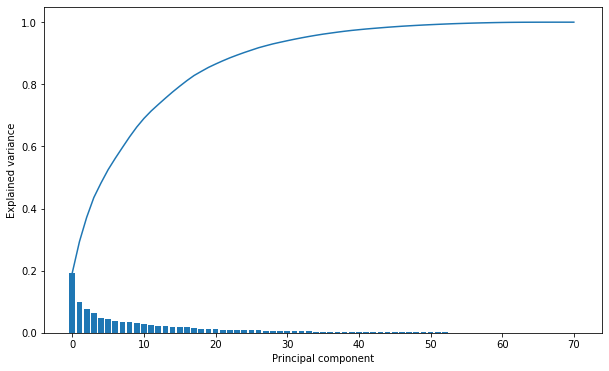

In [83]:
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()

In [84]:
pca = PCA(n_components=0.80)
pca.fit(X_norm[:train_end_idx])
X_pca = pca.transform(X_norm)

In [85]:
dataset_norm = np.concatenate((X_pca, y_norm), axis=1)

past_history = 24
future_target = 0

In [86]:
X_train, y_train = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                     0, train_end_idx, past_history, 
                                     future_target, step=1, single_step=True)

In [87]:
X_val, y_val = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                 train_end_idx, cv_end_idx, past_history, 
                                 future_target, step=1, single_step=True)

In [88]:
X_test, y_test = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                   cv_end_idx, test_end_idx, past_history, 
                                   future_target, step=1, single_step=True)

In [89]:
batch_size = 32
buffer_size = 1000

In [90]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation = validation.batch(batch_size).prefetch(1)

In [91]:
input_shape = X_train.shape[-2:]
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [92]:
y_test = y_test.reshape(-1, 1)
y_test_inv = scaler_y.inverse_transform(y_test)

In [93]:
def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

In [96]:
tf.keras.backend.clear_session()

multivariate_stacked_lstm = tf.keras.models.Sequential([
    LSTM(250, input_shape=input_shape, 
         return_sequences=True),
    LSTM(150, return_sequences=True),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_stacked_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=3e-3, amsgrad=True)

multivariate_stacked_lstm.compile(loss=loss,
                                  optimizer=optimizer,
                                  metrics=metric)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [97]:
history = multivariate_stacked_lstm.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping, 
                                           model_checkpoint])

Epoch 1/120
845/845 [==============================] - 135s 155ms/step - loss: 0.0208 - root_mean_squared_error: 0.1441 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0743
Epoch 2/120
845/845 [==============================] - 123s 145ms/step - loss: 0.0043 - root_mean_squared_error: 0.0656 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625
Epoch 3/120
845/845 [==============================] - 131s 155ms/step - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0563
Epoch 4/120
845/845 [==============================] - 120s 141ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 5/120
845/845 [==============================] - 119s 141ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0574
Epoch 6/120
845/845 [==============================] - 119s 140ms/step - loss: 0.0018 - root_mean_squared_error: 0.

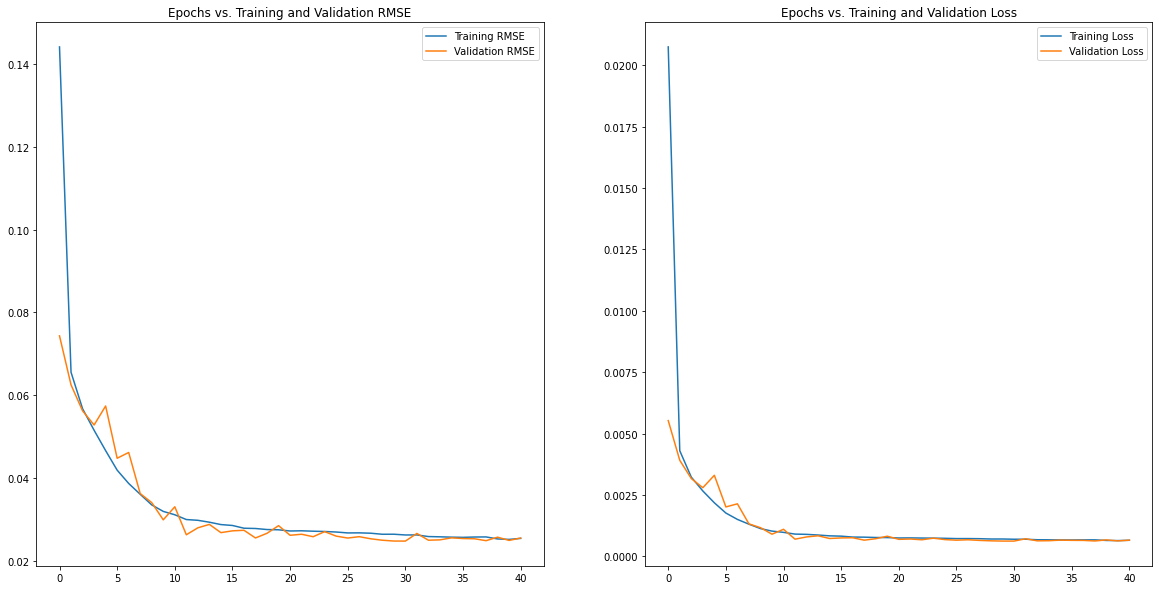

In [99]:
plot_model_rmse_and_loss(history)

In [102]:
multivariate_stacked_lstm = tf.keras.models.load_model('multivariate_stacked_lstm.h5')

forecast = multivariate_stacked_lstm.predict(X_test)
multivariate_stacked_lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_stacked_lstm = sqrt(mean_squared_error(y_test_inv, 
                                                 multivariate_stacked_lstm_forecast))
print('RMSE of hour-ahead electricity price multivariate Stacked LSTM forecast: {}'
      .format(round(rmse_mult_stacked_lstm, 3)))

RMSE of hour-ahead electricity price multivariate Stacked LSTM forecast: 2.281
